# Setting

In [4]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from scripts.simulator import VariableLocalTransaction, StableTransaction
from scripts.price_data.get_price import GetPriceData

price_getter = GetPriceData()

from pprint import pprint

In [75]:
jct_portfolio_A = {
    'JPY': {
        'num': 35000000,
        'is_usd': False
    },
    '8411.T': {
        'num': 100000,
        'is_usd': False
    },
    '8306.T': {
        'num': 100000,
        'is_usd': False
    }
}

# jct_portfolio_B = {
#     'JPY': {
#         'num': 10000000,
#         'is_usd': False
#     }
# }

st_portfolio = {
    'MSFT': {
        'num': 1000,
        'is_usd': True
    },
    '3697.T': {
        'num': 10000,
        'is_usd': False
    },
    '6578.T': {
        'num': 10000,
        'is_usd': False
    },
}

# JCT 価値固定

## シミュレーション

In [76]:
from datetime import date, timedelta

def date_range(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

transaction = StableTransaction(jct_portfolio_A, st_portfolio, date(2021, 6, 14), lender_loan_ratio=1.05, print_log=True, auto_deposit=True)


print('Start simulation...')
print('='*50)
for date in date_range(date(2021, 6, 15), date(2021, 7, 15)):
    print('='*50)
    print(date)
    transaction.check_diff_and_margin_call(date)
    print('='*50)
print('='*50)
print('Finished.')
# pprint(transaction.logs)
# print(transaction.jct_portfolio)
# print(transaction.st_portfolio)
# print(f'borrower jct num: {transaction.borrower_jct_num}')
# print(f'lender jct num: {transaction.lender_jct_num}')


{'JPY': {'num': 35000000, 'is_usd': False}, '8411.T': {'num': 100000, 'is_usd': False}, '8306.T': {'num': 100000, 'is_usd': False}} {'MSFT': {'num': 1000, 'is_usd': True}, '3697.T': {'num': 10000, 'is_usd': False}, '6578.T': {'num': 10000, 'is_usd': False}} 2021-06-14
("JCT portfolio: {'JPY': {'num': 35000000, 'is_usd': False}, '8411.T': {'num': "
 "100000, 'is_usd': False}, '8306.T': {'num': 100000, 'is_usd': False}}")
("ST portfolio: {'MSFT': {'num': 1000, 'is_usd': True}, '3697.T': {'num': "
 "10000, 'is_usd': False}, '6578.T': {'num': 10000, 'is_usd': False}}")
2021-06-14: Price updating...
MSFT: 28512.2
3697.T: 16880.0
6578.T: 343.0
2021-06-14: Price updating...
JPY: 1.0
8411.T: 1618.0
8306.T: 604.7
Transaction is made.
{'auto_deposit': False,
 'borrower_jct_num': 46490690,
 'date': datetime.date(2021, 6, 14),
 'jct_diff_num': 0,
 'jct_total_num': 257270000,
 'lender_jct_num': 210779310,
 'moved_jct_num': 0,
 'st_total_value': 210779310}
Start simulation...
2021-06-15
2021-06-15: 

8411.T: 1622.5
8306.T: 610.9
OK. JCT is properly issued or deleted and moved.
{'auto_deposit': False,
 'borrower_jct_num': 50807500,
 'date': datetime.date(2021, 6, 28),
 'jct_diff_num': 0,
 'jct_total_num': 258340000,
 'lender_jct_num': 207532500,
 'moved_jct_num': 0,
 'st_total_value': 197650000.0}
2021-06-29
2021-06-29: Price updating...
MSFT: 29780.0
3697.T: 16840.0
6578.T: 335.0
2021-06-29: Price updating...
JPY: 1.0
8411.T: 1596.0
8306.T: 601.5
OK. JCT is properly issued or deleted and moved.
{'auto_deposit': False,
 'borrower_jct_num': 43143500,
 'date': datetime.date(2021, 6, 29),
 'jct_diff_num': -3590000,
 'jct_total_num': 254750000,
 'lender_jct_num': 211606500,
 'moved_jct_num': 4074000,
 'st_total_value': 201530000.0}
2021-06-30
2021-06-30: Price updating...
MSFT: 30017.6
3697.T: 17210.0
6578.T: 332.0
2021-06-30: Price updating...
JPY: 1.0
8411.T: 1587.5
8306.T: 600.0
OK. JCT is properly issued or deleted and moved.
{'auto_deposit': False,
 'borrower_jct_num': 38040520,
 '

2021-07-14: Price updating...
MSFT: 30999.1
3697.T: 20720.0
6578.T: 308.0
2021-07-14: Price updating...
JPY: 1.0
8411.T: 1588.5
8306.T: 596.7
OK. JCT is properly issued or deleted and moved.
{'auto_deposit': False,
 'borrower_jct_num': 176945,
 'date': datetime.date(2021, 7, 14),
 'jct_diff_num': -2430000,
 'jct_total_num': 253520000,
 'lender_jct_num': 253343055,
 'moved_jct_num': 960015,
 'st_total_value': 241279100.0}
Finished.


In [77]:
transaction.jct_portfolio

{'JPY': {'num': 35000000, 'is_usd': False, 'price': 1.0},
 '8411.T': {'num': 100000, 'is_usd': False, 'price': 1588.5},
 '8306.T': {'num': 100000, 'is_usd': False, 'price': 596.7}}

## ログの可視化

In [78]:
logs = transaction.logs
date_list = [log['date'] for log in logs]
st_total_value_list = [log['st_total_value'] for log in logs]
jct_total_num_list = [log['jct_total_num'] for log in logs]
borrower_jct_num_list = [log['borrower_jct_num'] for log in logs]
lender_jct_num_list = [log['lender_jct_num'] for log in logs]
jct_diff_num_list = [log['jct_diff_num'] for log in logs]
moved_jct_num_list = [log['moved_jct_num'] for log in logs]
deposit_bool_list = [log['auto_deposit'] for log in logs]

date_auto_deposit = []
for i, x in enumerate(deposit_bool_list):
    if x:
        date_auto_deposit.append(date_list[i])

In [79]:
logs

[{'date': datetime.date(2021, 6, 14),
  'st_total_value': 210779310,
  'jct_total_num': 257270000,
  'borrower_jct_num': 46490690,
  'lender_jct_num': 210779310,
  'jct_diff_num': 0,
  'moved_jct_num': 0,
  'auto_deposit': False},
 {'date': datetime.date(2021, 6, 15),
  'st_total_value': 197852200.0,
  'jct_total_num': 258320000,
  'borrower_jct_num': 50575190,
  'lender_jct_num': 207744810,
  'jct_diff_num': 1050000,
  'moved_jct_num': -3034500,
  'auto_deposit': False},
 {'date': datetime.date(2021, 6, 16),
  'st_total_value': 197090100.0,
  'jct_total_num': 258020000,
  'borrower_jct_num': 51075395,
  'lender_jct_num': 206944605,
  'jct_diff_num': -300000,
  'moved_jct_num': -800205,
  'auto_deposit': False},
 {'date': datetime.date(2021, 6, 17),
  'st_total_value': 193593400.0,
  'jct_total_num': 260150000,
  'borrower_jct_num': 56876930,
  'lender_jct_num': 203273070,
  'jct_diff_num': 2130000,
  'moved_jct_num': -3671535,
  'auto_deposit': False},
 {'date': datetime.date(2021, 6,

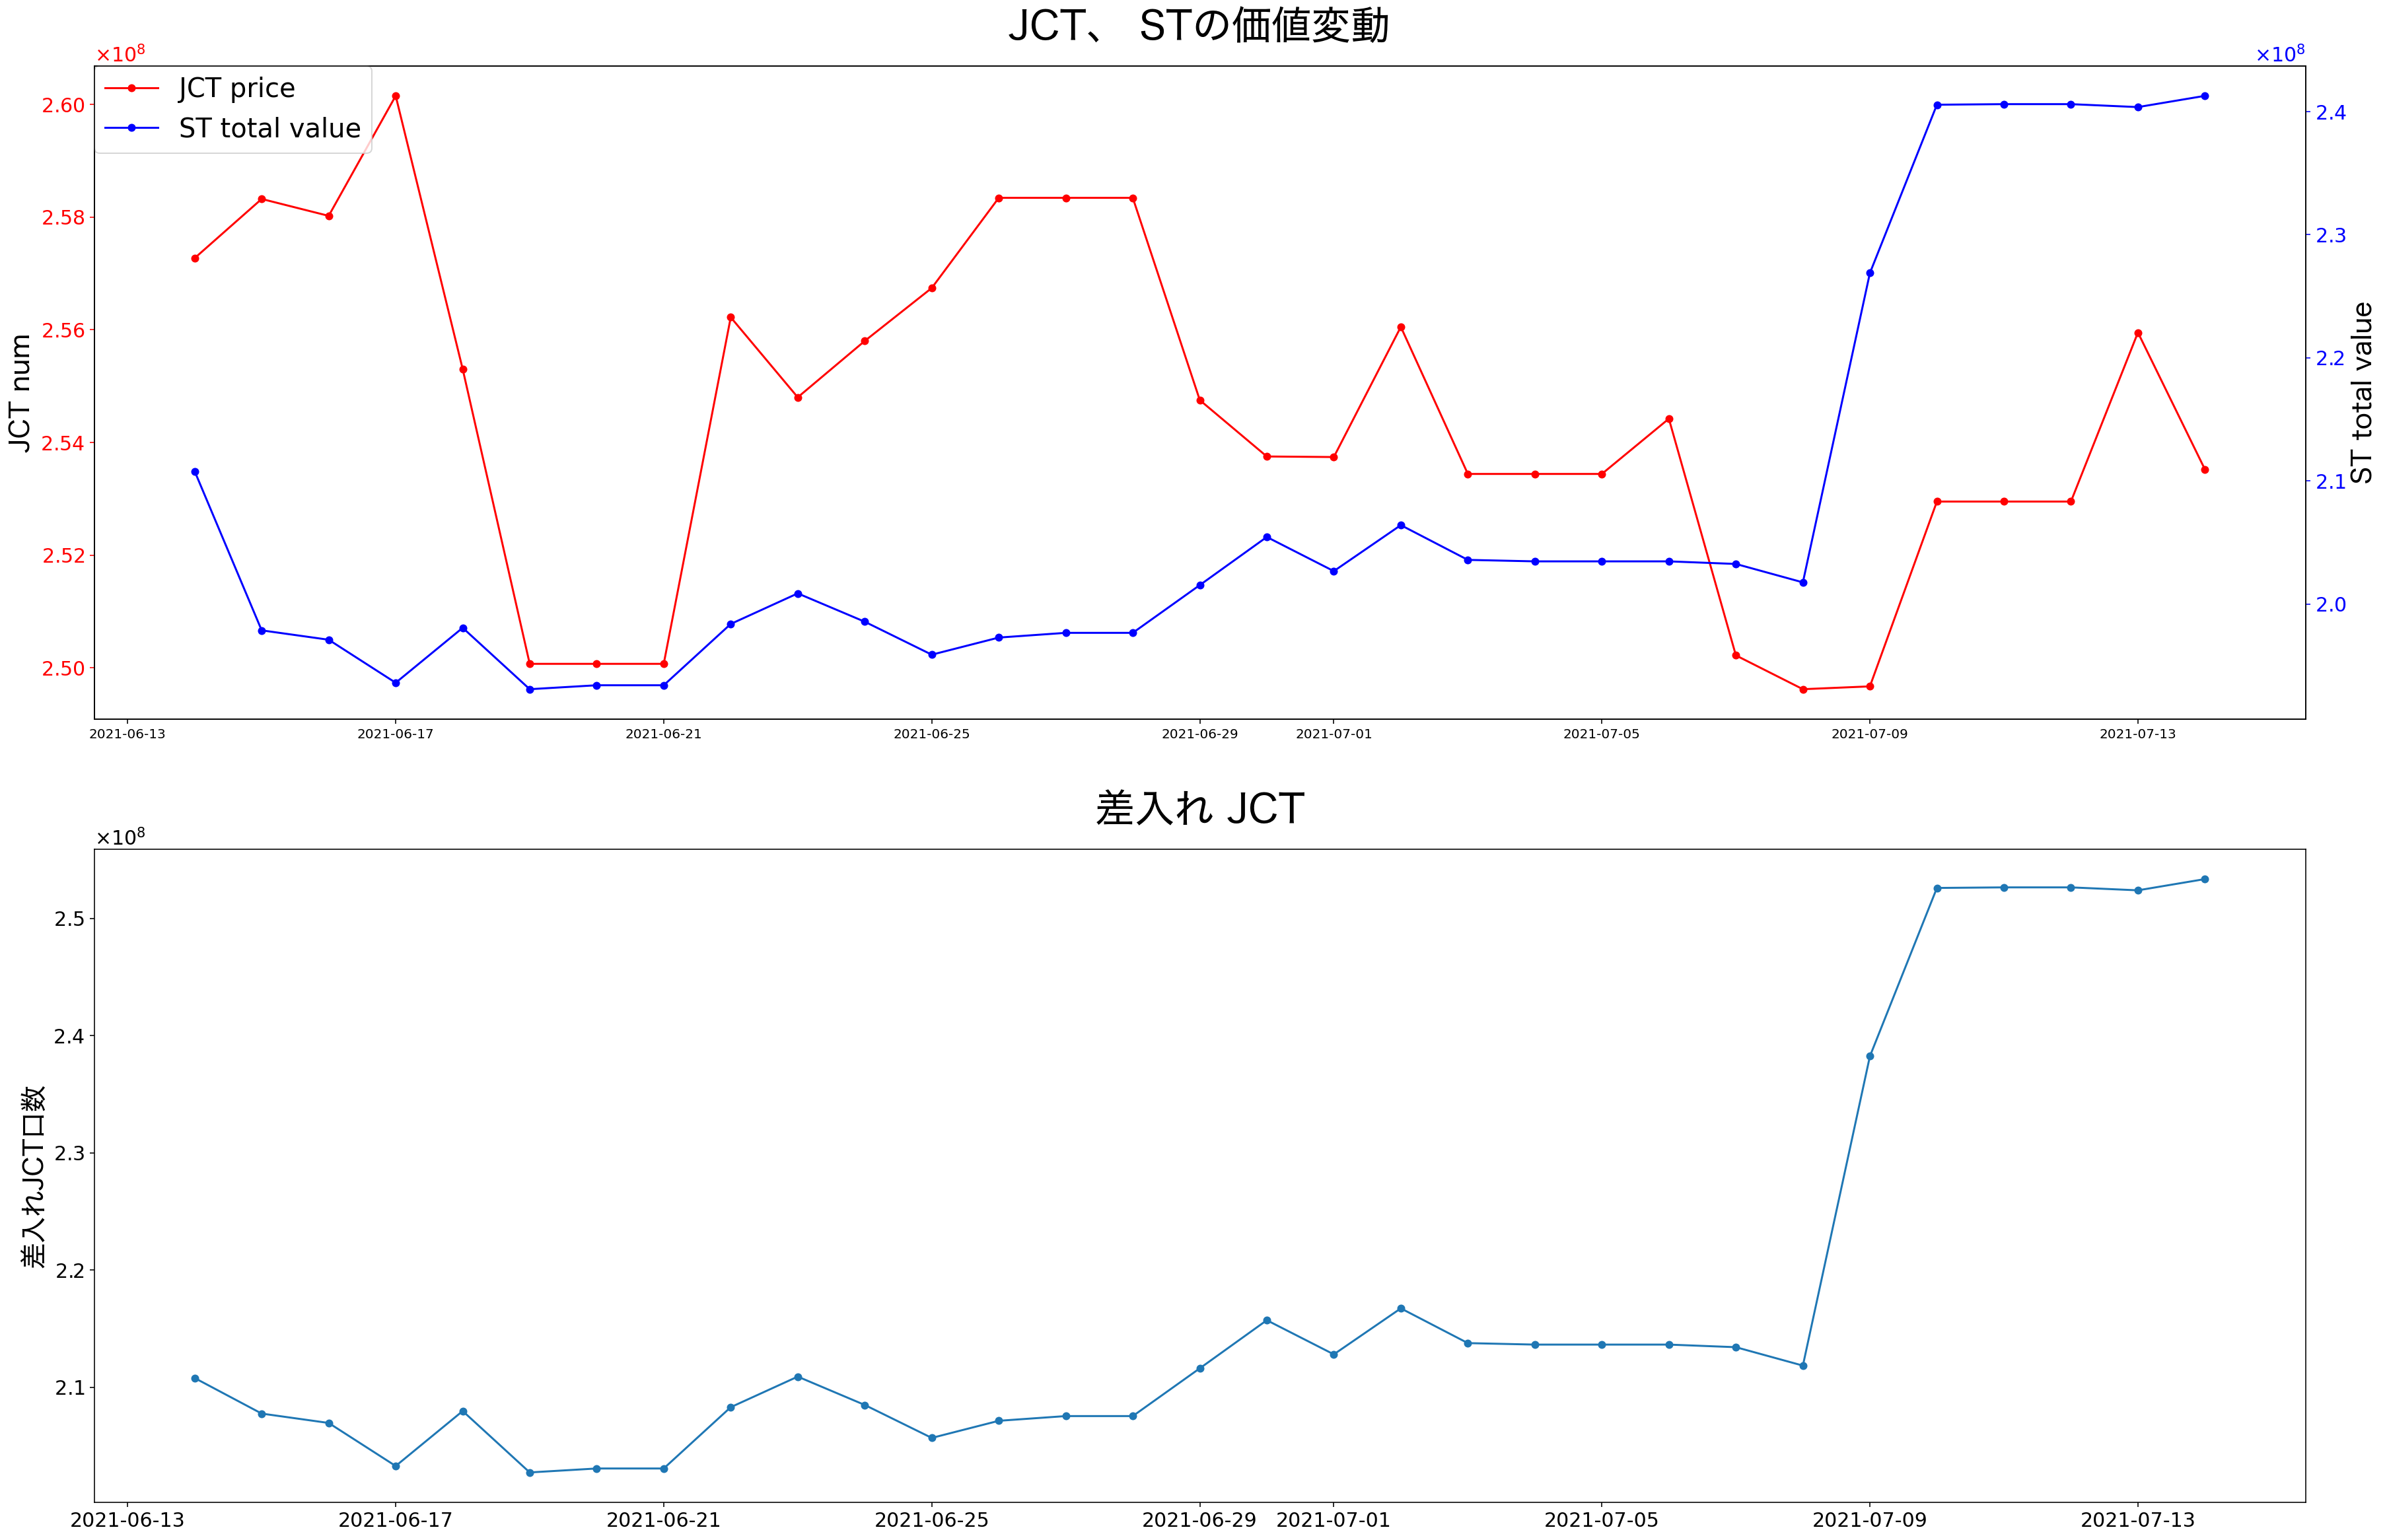

In [80]:
fig = plt.figure(figsize=(30,20))
# fig, ax1 = plt.subplots(figsize=(20,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1_2 = ax1.twinx()

plt.title('JCT、 STの価値変動', fontsize=30, pad=20, fontname="Hiragino Sans")
ax1.plot(date_list, jct_total_num_list, marker='o', markersize=5, color='red', label='JCT price')
ax1.set_ylabel('JCT num', fontsize=20, fontname="Hiragino Sans")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1_2.plot(date_list, st_total_value_list, marker='o', markersize=5, color='blue', label='ST total value')
ax1_2.set_ylabel('ST total value', fontsize=20, fontname="Hiragino Sans")
ax1_2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax1_2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red', labelsize=15)
ax1.yaxis.offsetText.set_fontsize(15)
ax1.xaxis.offsetText.set_fontsize(15)
ax1_2.xaxis.offsetText.set_fontsize(15)
ax1_2.tick_params(axis='y', colors='blue', labelsize=15)
ax1_2.yaxis.offsetText.set_fontsize(15)
ax1.vlines(date_auto_deposit, min(jct_total_num_list), max(jct_total_num_list), color='orange', linestyle='dashed', linewidth=3)

ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5)
ax2.set_ylabel('差入れJCT口数', fontsize=20, fontname="Hiragino Sans")
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.tick_params(labelsize=15)
ax2.yaxis.offsetText.set_fontsize(15)
ax2.set_title('差入れ JCT', fontsize=30, pad=20, fontname="Hiragino Sans")
ax2.vlines(date_auto_deposit, min(lender_jct_num_list), max(lender_jct_num_list), color='orange', linestyle='dashed', linewidth=3)

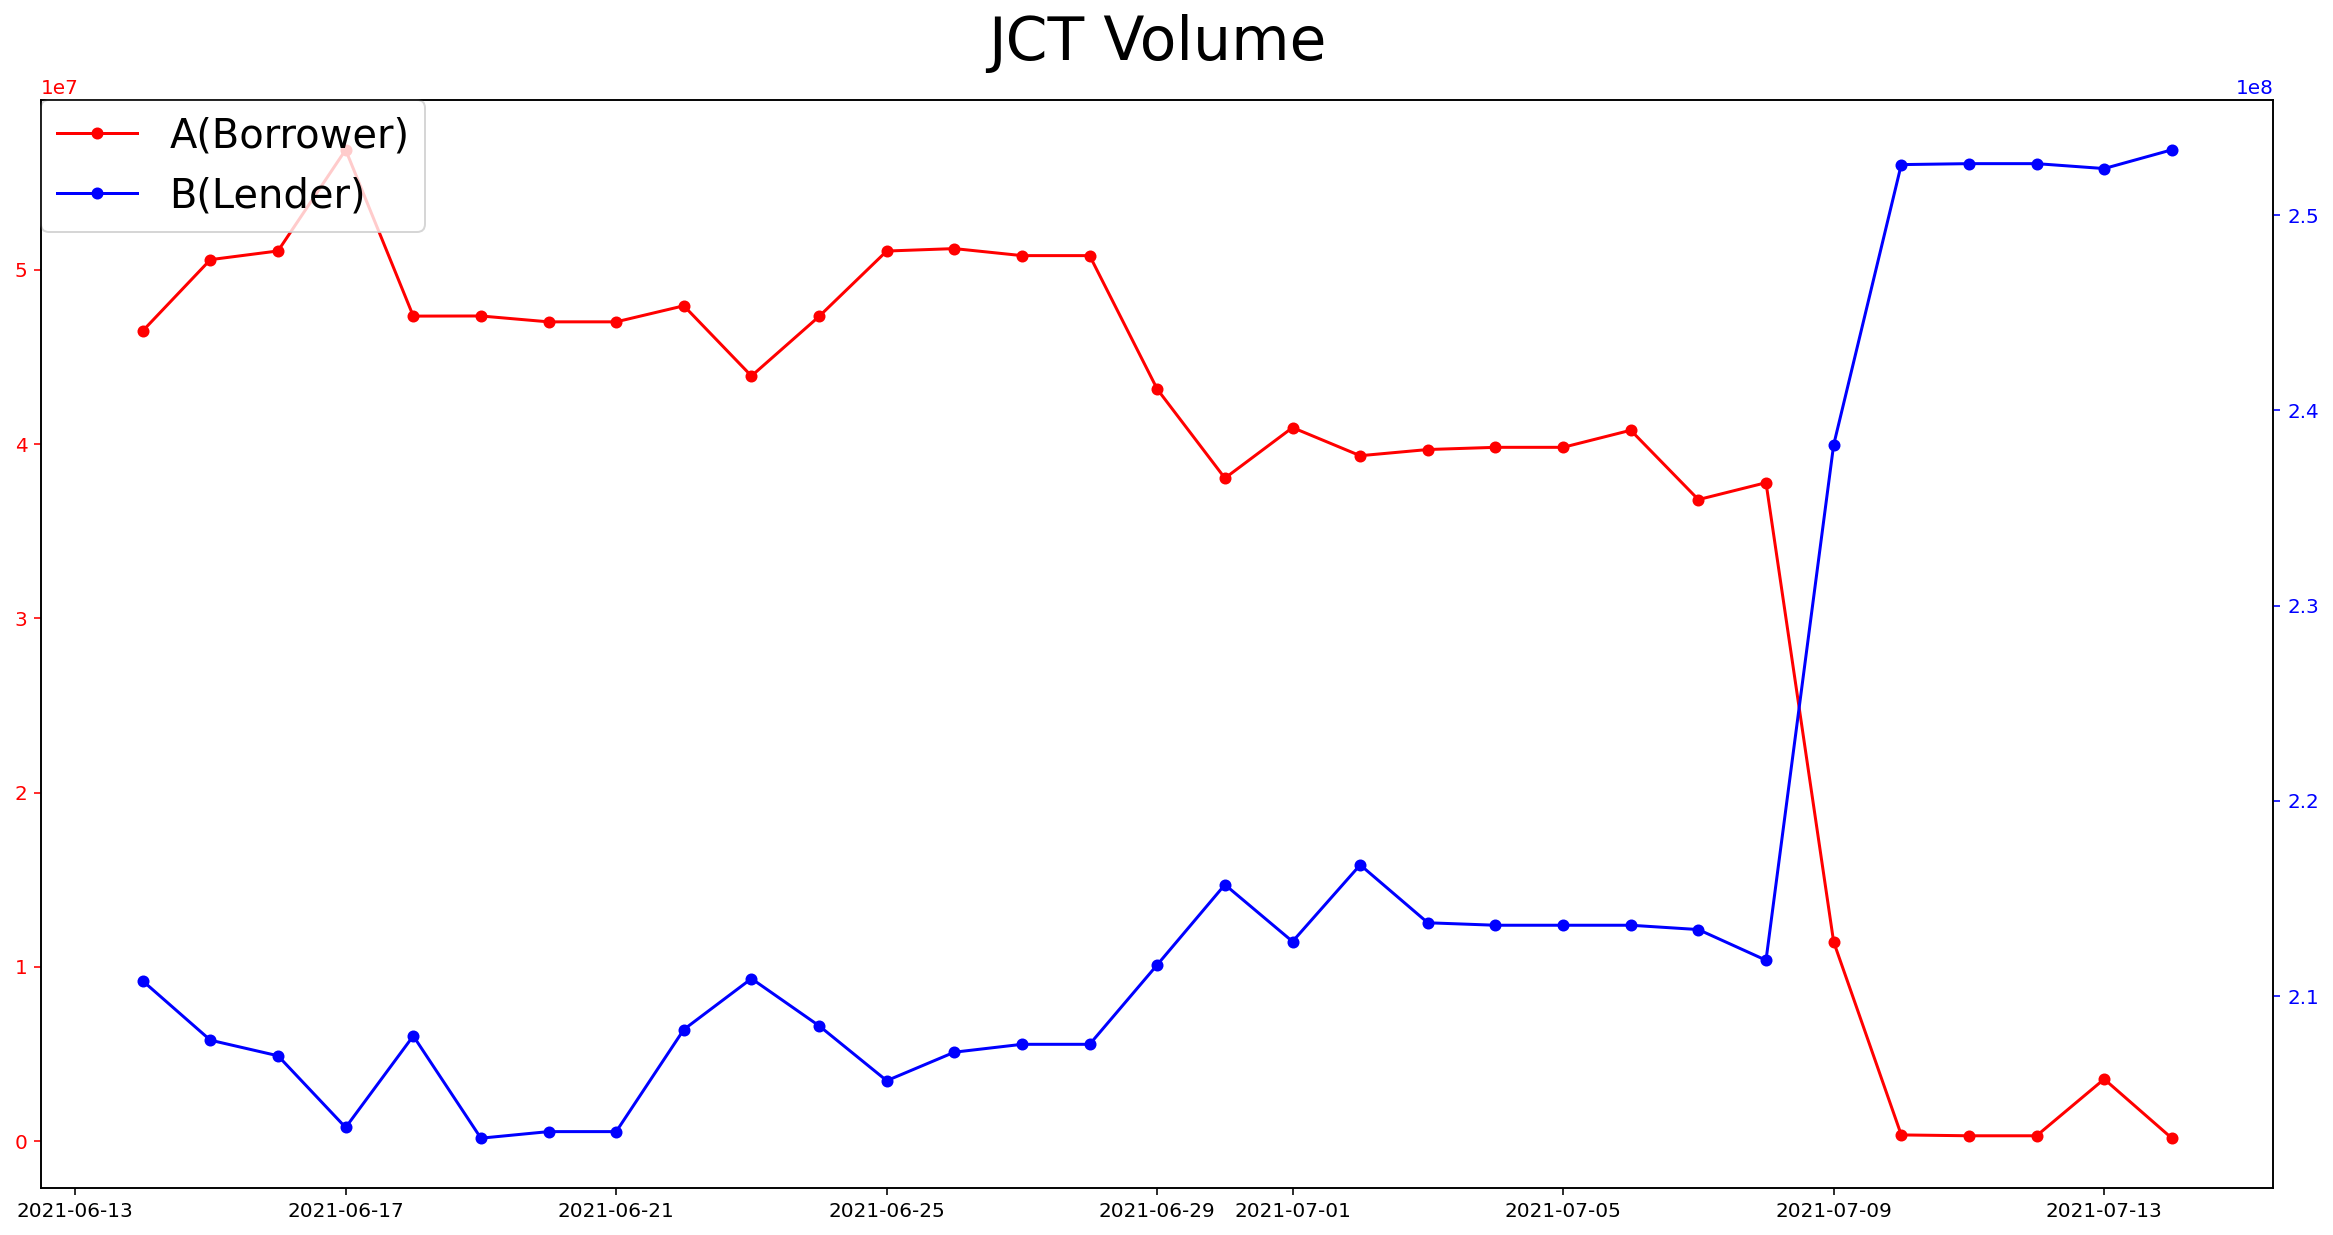

In [81]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

plt.title('JCT Volume', fontsize=30, pad=20)
ax1.plot(date_list, borrower_jct_num_list, marker='o', markersize=5, color='red', label='A(Borrower)')
# ax1.set_ylabel()
ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5, color='blue', label='B(Lender)')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')

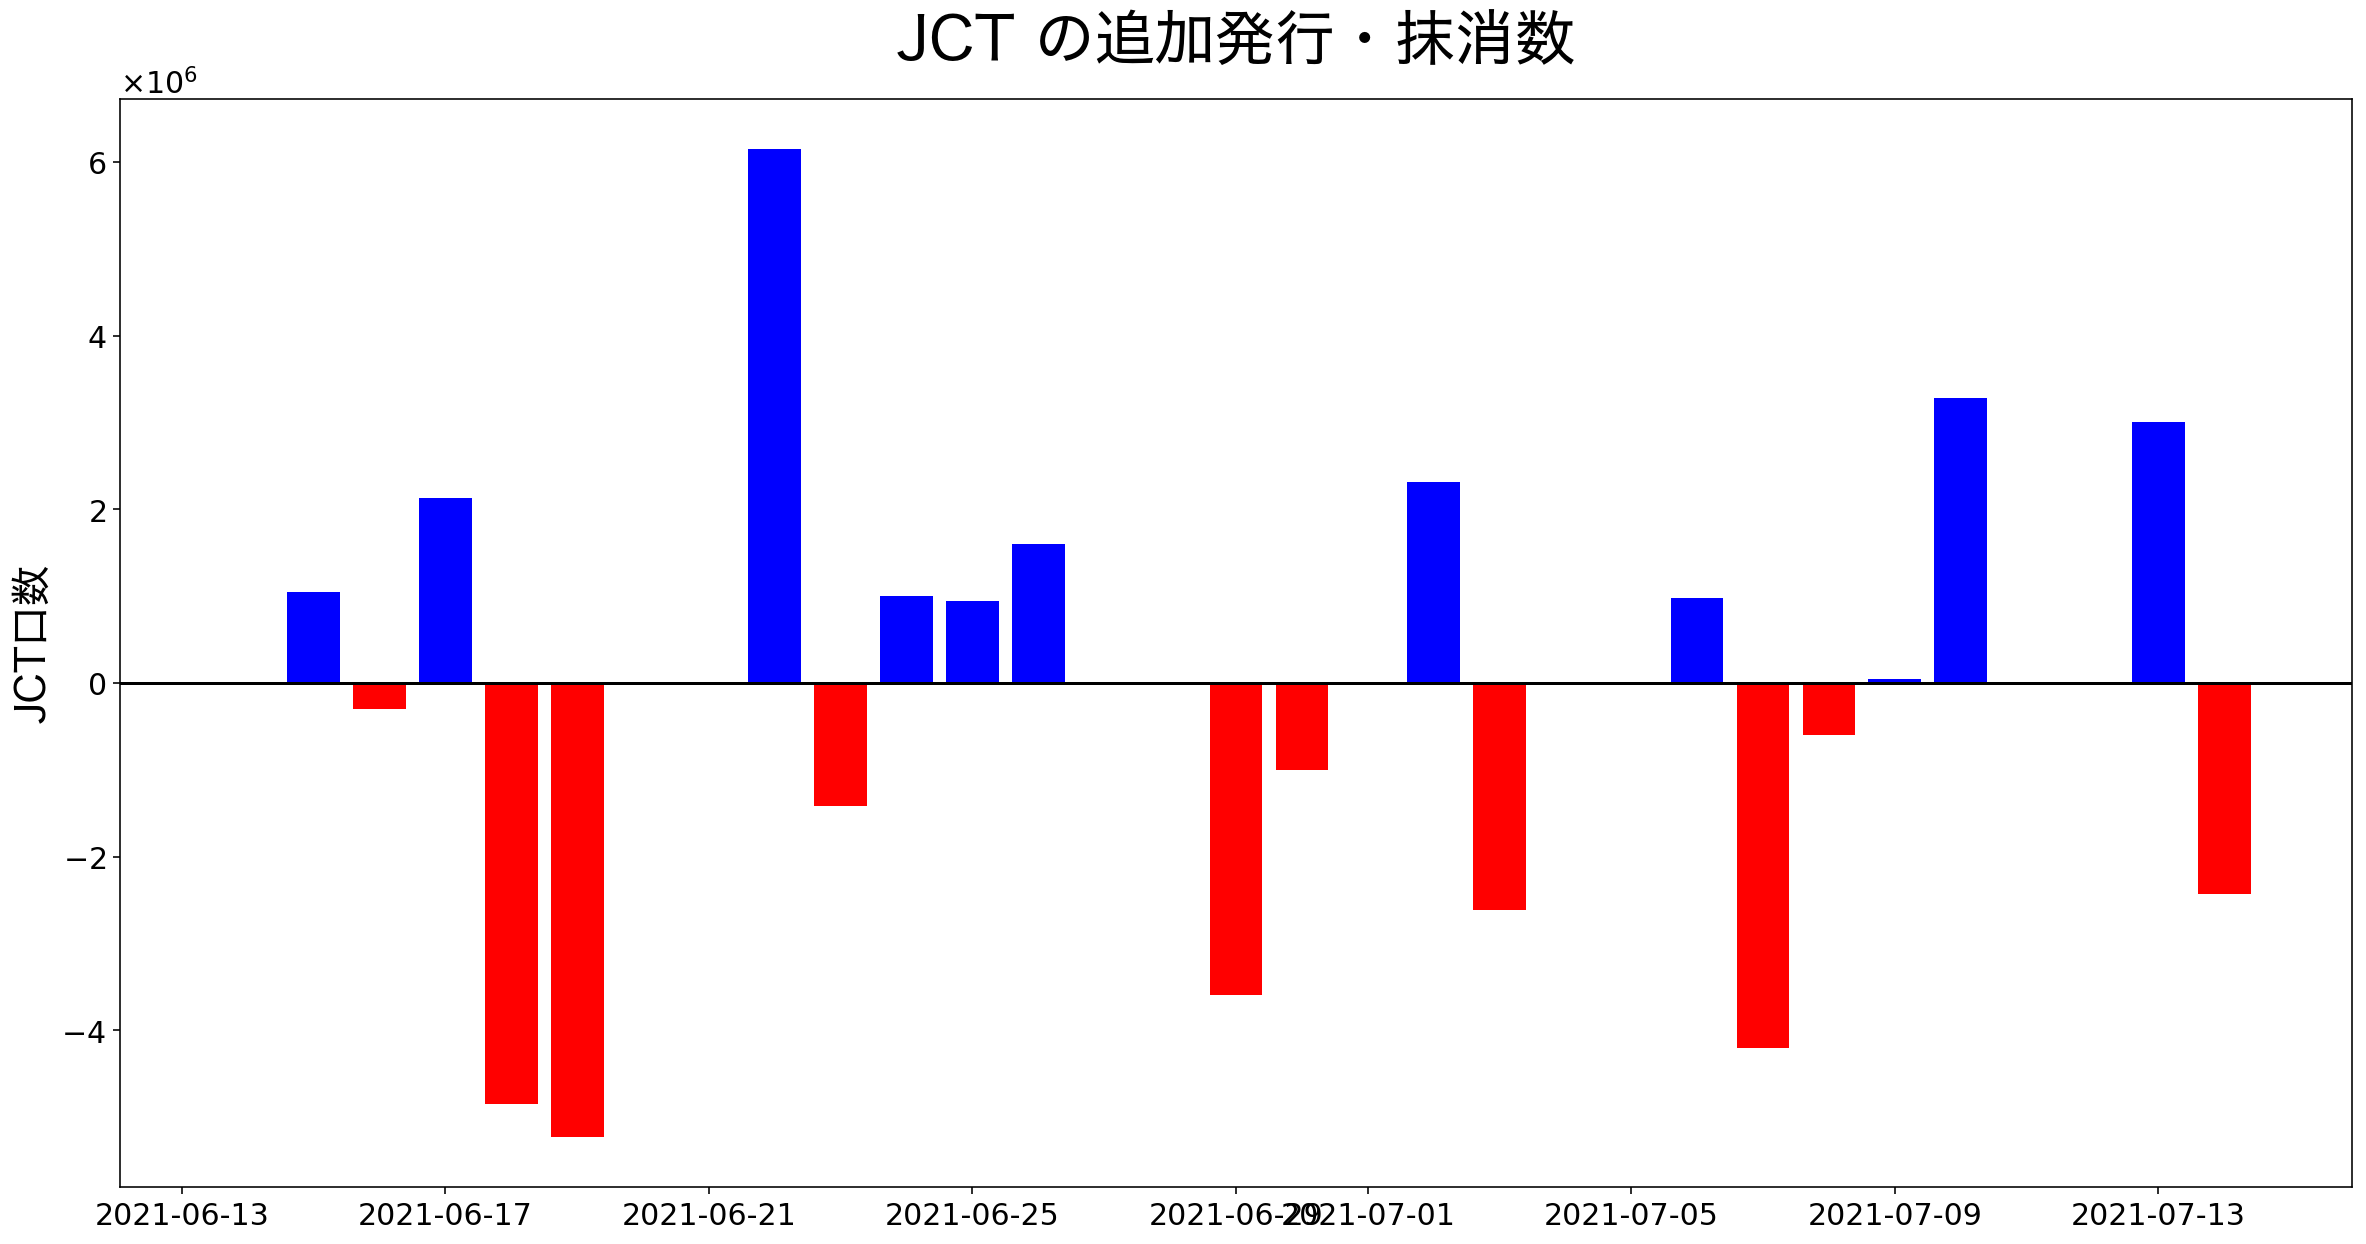

In [82]:
fig, ax = plt.subplots(figsize=(20,10))
jct_diff_num_color = ['blue' if diff > 0 else 'red' for diff in jct_diff_num_list]

ax.bar(date_list, jct_diff_num_list, color=jct_diff_num_color)
ax.set_title('JCT の追加発行・抹消数', fontsize=30, pad=20, fontname="Hiragino Sans")
ax.set_ylabel('JCT口数', fontsize=20, fontname='Hiragino Sans')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
ax.axhline(0, color='black')
ax.vlines(date_auto_deposit, min(jct_diff_num_list), max(jct_diff_num_list), color='orange', linestyle='dashed', linewidth=3)

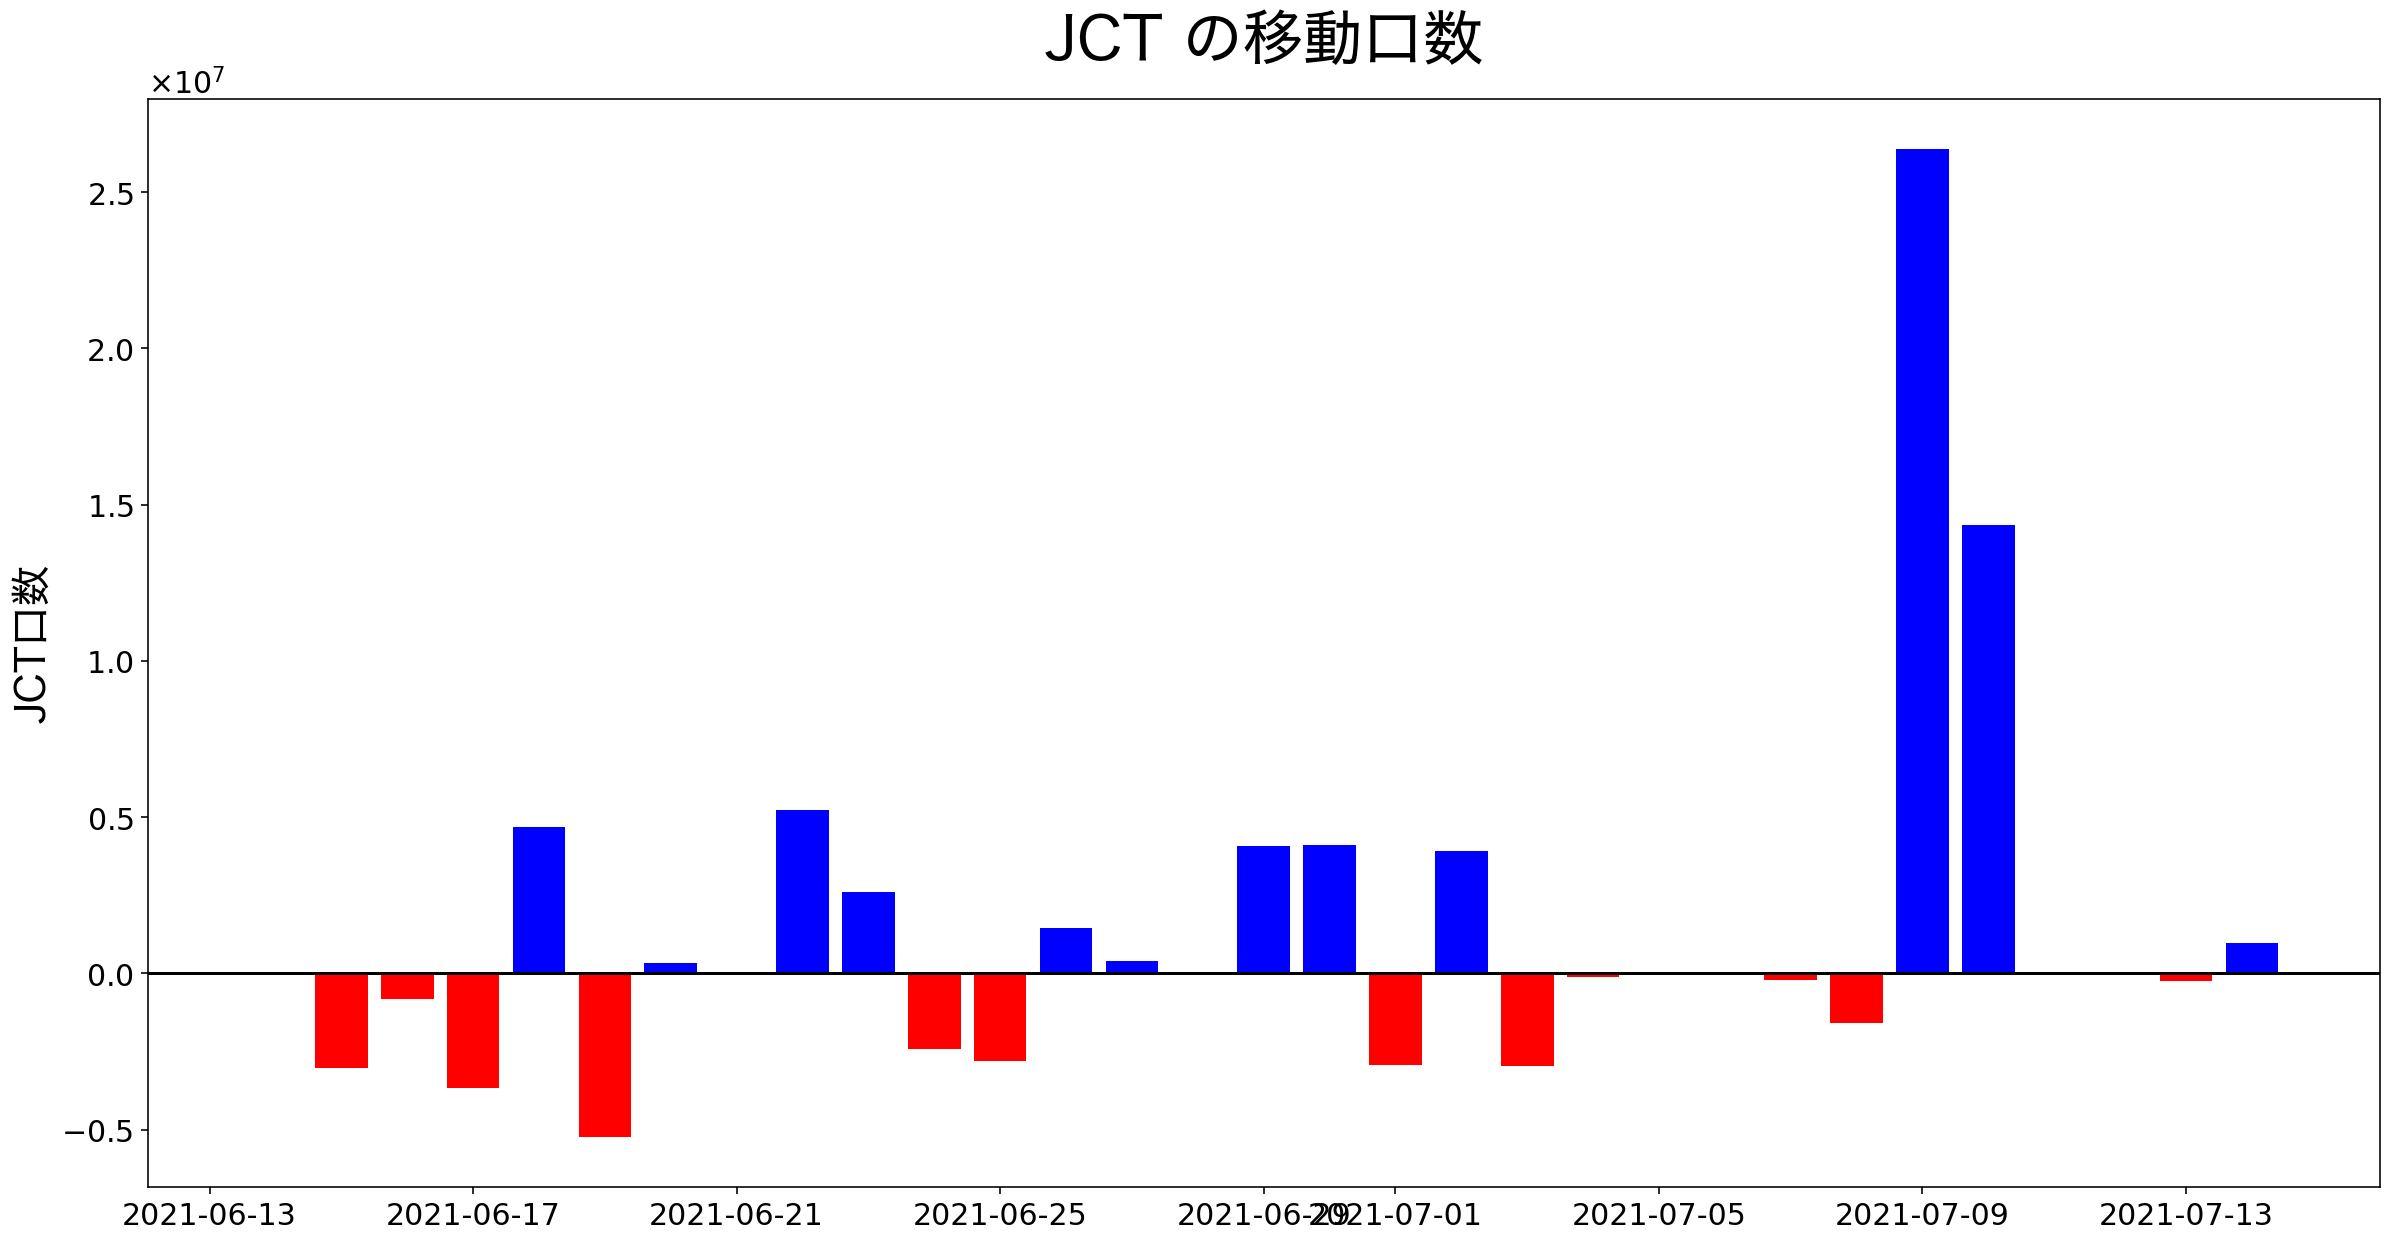

In [83]:
fig, ax = plt.subplots(figsize=(20,10))
moved_jct_num_color = ['blue' if diff > 0 else 'red' for diff in moved_jct_num_list]

ax.bar(date_list, moved_jct_num_list, color=moved_jct_num_color)
ax.set_title('JCT の移動口数', fontsize=30, pad=20, fontname="Hiragino Sans")
ax.set_ylabel('JCT口数', fontsize=20, fontname='Hiragino Sans')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
ax.axhline(0, color='black')
ax.vlines(date_auto_deposit, min(moved_jct_num_list), max(moved_jct_num_list), color='orange', linestyle='dashed', linewidth=3)